In [1]:
from processed_image import ProcessedImage, read_from_dir, show_image_strip
imgs = list(read_from_dir('..\\Data\\LittleCarDb1'))
[str(img) for img in imgs[0:5]]

['ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-001_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-002_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-005_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-007_1.jpg (0 in cache)',
 'ProcessedImage for ..\\Data\\LittleCarDb1\\SF0836-008_1.jpg (0 in cache)']

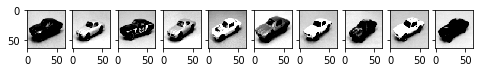

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
_, axes = plt.subplots(1, 10, sharey=True, figsize=(8,1.5))
show_image_strip(imgs, axes)

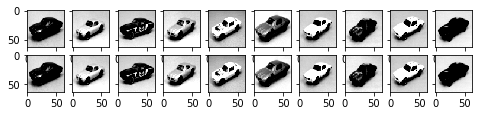

In [3]:
_, axes = plt.subplots(2, 10, sharey=True, figsize=(8,1.5))
processed_dict = {img.fullpath:img.get_processed_image() for img in imgs}
show_image_strip(imgs, axes, predicted_dict=processed_dict)

In [4]:
import numpy as np
x_train = [img.get_processed_image(size=128) for img in imgs]
x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

In [5]:
from model_vae_3stage import ModelVae3Stage
all_model = ModelVae3Stage(size=128, in_channels=1, latent_dim=8)
vae, enc, dec = all_model.vae, all_model.encoder, all_model.decoder

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
import random
x_test = np.array(random.sample(list(x_train), int(len(x_train)/10)))
x_train.shape, x_test.shape

((171, 128, 128, 1), (17, 128, 128, 1))

In [7]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Instructions for updating:
Use tf.cast instead.
Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 14s 82ms/step - loss: 0.1361 - val_loss: 0.1326
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1357 - val_loss: 0.1320
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1351 - val_loss: 0.1313
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1345 - val_loss: 0.1305
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1338 - val_loss: 0.1297
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1330 - val_loss: 0.1288
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1322 - val_loss: 0.1278
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1313 - val_loss: 0.1267
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.1303 - val_

Epoch 78/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0728 - val_loss: 0.0728
Epoch 79/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0726 - val_loss: 0.0687
Epoch 80/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0723 - val_loss: 0.0740
Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0728 - val_loss: 0.0696
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0724 - val_loss: 0.0730
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0722 - val_loss: 0.0690
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0725 - val_loss: 0.0725
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0724 - val_loss: 0.0703
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0724 - val_loss: 0.0721
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 157/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0703 - val_loss: 0.0692
Epoch 158/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0701 - val_loss: 0.0699
Epoch 159/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0702 - val_loss: 0.0680
Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0701 - val_loss: 0.0702
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0701 - val_loss: 0.0684
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0699 - val_loss: 0.0700
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0701 - val_loss: 0.0685
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0700 - val_loss: 0.0699
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0698 - val_loss: 0.0678
Epoch 166/1000
171/171 [==============================] - 0s 1ms

Epoch 236/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0697 - val_loss: 0.0696
Epoch 237/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0697 - val_loss: 0.0675
Epoch 238/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0698 - val_loss: 0.0701
Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0697 - val_loss: 0.0674
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0699 - val_loss: 0.0696
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0697 - val_loss: 0.0677
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0700 - val_loss: 0.0693
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0698 - val_loss: 0.0678
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 245/1000
171/171 [==============================] - 0s 1ms

Epoch 315/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0693 - val_loss: 0.0677
Epoch 316/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0691 - val_loss: 0.0689
Epoch 317/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0694 - val_loss: 0.0670
Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0694 - val_loss: 0.0690
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0692 - val_loss: 0.0678
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0695 - val_loss: 0.0688
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0693 - val_loss: 0.0676
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0693 - val_loss: 0.0683
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0693 - val_loss: 0.0677
Epoch 324/1000
171/171 [==============================] - 0s 1ms

Epoch 394/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0692 - val_loss: 0.0691
Epoch 395/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0692 - val_loss: 0.0677
Epoch 396/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0691 - val_loss: 0.0689
Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0690 - val_loss: 0.0667
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0692 - val_loss: 0.0685
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0692 - val_loss: 0.0672
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0693 - val_loss: 0.0693
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0693 - val_loss: 0.0668
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0691 - val_loss: 0.0684
Epoch 403/1000
171/171 [==============================] - 0s 1ms

Epoch 473/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0646 - val_loss: 0.0597
Epoch 474/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0628 - val_loss: 0.0603
Epoch 475/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0595 - val_loss: 0.0560
Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0591 - val_loss: 0.0578
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0579 - val_loss: 0.0580
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0583 - val_loss: 0.0548
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0568 - val_loss: 0.0529
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0556 - val_loss: 0.0531
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0541 - val_loss: 0.0515
Epoch 482/1000
171/171 [==============================] - 0s 1ms

Epoch 552/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0487 - val_loss: 0.0482
Epoch 553/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0486 - val_loss: 0.0490
Epoch 554/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0487 - val_loss: 0.0485
Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0485 - val_loss: 0.0486
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0486 - val_loss: 0.0487
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0485 - val_loss: 0.0493
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0484 - val_loss: 0.0481
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0485 - val_loss: 0.0491
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0486 - val_loss: 0.0485
Epoch 561/1000
171/171 [==============================] - 0s 1ms

Epoch 631/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0474 - val_loss: 0.0471
Epoch 632/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0475 - val_loss: 0.0475
Epoch 633/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0473 - val_loss: 0.0468
Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0475 - val_loss: 0.0475
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0475 - val_loss: 0.0474
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0480 - val_loss: 0.0481
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0478 - val_loss: 0.0478
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0482 - val_loss: 0.0480
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0476 - val_loss: 0.0475
Epoch 640/1000
171/171 [==============================] - 0s 1ms

Epoch 710/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0464 - val_loss: 0.0463
Epoch 711/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0466 - val_loss: 0.0465
Epoch 712/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0466 - val_loss: 0.0461
Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0468 - val_loss: 0.0466
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0467 - val_loss: 0.0466
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0470 - val_loss: 0.0471
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0469 - val_loss: 0.0470
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0474 - val_loss: 0.0474
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0473 - val_loss: 0.0472
Epoch 719/1000
171/171 [==============================] - 0s 1ms

Epoch 789/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0455 - val_loss: 0.0455
Epoch 790/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.0453
Epoch 791/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0461 - val_loss: 0.0461
Epoch 792/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0462 - val_loss: 0.0462
Epoch 793/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0465 - val_loss: 0.0465
Epoch 794/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0466 - val_loss: 0.0458
Epoch 795/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0461 - val_loss: 0.0456
Epoch 796/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0461 - val_loss: 0.0452
Epoch 797/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0455 - val_loss: 0.0449
Epoch 798/1000
171/171 [==============================] - 0s 1ms

Epoch 868/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0439 - val_loss: 0.0438
Epoch 869/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0436 - val_loss: 0.0435
Epoch 870/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0434 - val_loss: 0.0435
Epoch 871/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0432 - val_loss: 0.0434
Epoch 872/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0435 - val_loss: 0.0450
Epoch 873/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.0471
Epoch 874/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0466 - val_loss: 0.0472
Epoch 875/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0472 - val_loss: 0.0452
Epoch 876/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0436
Epoch 877/1000
171/171 [==============================] - 0s 1ms

Epoch 947/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0423 - val_loss: 0.0419
Epoch 948/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0419 - val_loss: 0.0416
Epoch 949/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0420 - val_loss: 0.0417
Epoch 950/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.0413
Epoch 951/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0417 - val_loss: 0.0418
Epoch 952/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0415 - val_loss: 0.0413
Epoch 953/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0414 - val_loss: 0.0416
Epoch 954/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0413 - val_loss: 0.0415
Epoch 955/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0416 - val_loss: 0.0419
Epoch 956/1000
171/171 [==============================] - 0s 1ms

In [9]:
def show_original_decoded(original, decoded, sz):
    n = 10  # how many digits we will display
    plt.figure(figsize=(n*2, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(original[i].reshape(128, 128), cmap='gray')
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded[i].reshape(128, 128), cmap='gray')
    plt.show()

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


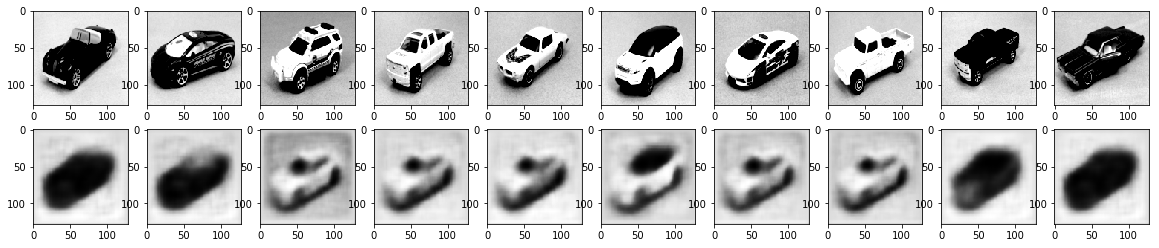

In [10]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [11]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0427 - val_loss: 0.0426
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0418 - val_loss: 0.0408
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0416 - val_loss: 0.0415
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0406 - val_loss: 0.0398
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0402 - val_loss: 0.0408
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0400 - val_loss: 0.0394
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0399 - val_loss: 0.0405
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0397 - val_loss: 0.0394
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0397 - val_loss: 0.0407
Epoch 10/1000
171/171 [==============

Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0384 - val_loss: 0.0386
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0390 - val_loss: 0.0404
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0394 - val_loss: 0.0399
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0405 - val_loss: 0.0411
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0401 - val_loss: 0.0398
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0405 - val_loss: 0.0397
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0392 - val_loss: 0.0389
Epoch 88/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0390 - val_loss: 0.0387
Epoch 89/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0385 - val_loss: 0.0385
Epoch 90/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0380
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0378
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0378
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0373 - val_loss: 0.0377
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0379
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0373 - val_loss: 0.0377
Epoch 166/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0375 - val_loss: 0.0374
Epoch 167/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0372 - val_loss: 0.0376
Epoch 168/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0374 - val_loss: 0.0373
Epoch 169/1000
171/171 [==============================] - 0s 1ms

Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0388
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0391 - val_loss: 0.0399
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0387 - val_loss: 0.0387
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0391
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0380 - val_loss: 0.0378
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0378 - val_loss: 0.0381
Epoch 245/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0373 - val_loss: 0.0376
Epoch 246/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0374 - val_loss: 0.0378
Epoch 247/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0381
Epoch 248/1000
171/171 [==============================] - 0s 1ms

Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0366 - val_loss: 0.0374
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0366 - val_loss: 0.0374
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0374 - val_loss: 0.0378
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0366 - val_loss: 0.0368
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0367 - val_loss: 0.0371
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0359 - val_loss: 0.0362
Epoch 324/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0358 - val_loss: 0.0366
Epoch 325/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0356 - val_loss: 0.0360
Epoch 326/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0357 - val_loss: 0.0367
Epoch 327/1000
171/171 [==============================] - 0s 1ms

Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0364 - val_loss: 0.0373
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0365 - val_loss: 0.0369
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0365 - val_loss: 0.0363
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0359 - val_loss: 0.0355
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0352 - val_loss: 0.0353
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0349 - val_loss: 0.0349
Epoch 403/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.0349
Epoch 404/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0346 - val_loss: 0.0350
Epoch 405/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0344 - val_loss: 0.0351
Epoch 406/1000
171/171 [==============================] - 0s 1ms

Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0352 - val_loss: 0.0359
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0352 - val_loss: 0.0356
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0353 - val_loss: 0.0354
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0348 - val_loss: 0.0347
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.0346
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0341 - val_loss: 0.0342
Epoch 482/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0338 - val_loss: 0.0342
Epoch 483/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0337 - val_loss: 0.0341
Epoch 484/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0337 - val_loss: 0.0343
Epoch 485/1000
171/171 [==============================] - 0s 1ms

Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0338 - val_loss: 0.0346
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0339 - val_loss: 0.0347
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0341 - val_loss: 0.0349
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0341 - val_loss: 0.0350
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0345 - val_loss: 0.0351
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0343 - val_loss: 0.0351
Epoch 561/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0347 - val_loss: 0.0351
Epoch 562/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0343 - val_loss: 0.0346
Epoch 563/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0342 - val_loss: 0.0345
Epoch 564/1000
171/171 [==============================] - 0s 1ms

Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0327 - val_loss: 0.0330
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0325 - val_loss: 0.0338
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0328 - val_loss: 0.0331
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0327 - val_loss: 0.0340
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0330 - val_loss: 0.0336
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0333 - val_loss: 0.0344
Epoch 640/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0334 - val_loss: 0.0343
Epoch 641/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0339 - val_loss: 0.0343
Epoch 642/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0335 - val_loss: 0.0339
Epoch 643/1000
171/171 [==============================] - 0s 1ms

Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0328
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0334
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0326 - val_loss: 0.0331
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0326 - val_loss: 0.0332
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0327 - val_loss: 0.0330
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0324 - val_loss: 0.0325
Epoch 719/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0322
Epoch 720/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0319
Epoch 721/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0314 - val_loss: 0.0319
Epoch 722/1000
171/171 [==============================] - 0s 1ms

Epoch 792/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0308 - val_loss: 0.0313
Epoch 793/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0313 - val_loss: 0.0319
Epoch 794/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0311 - val_loss: 0.0316
Epoch 795/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0319
Epoch 796/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0312 - val_loss: 0.0316
Epoch 797/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0313 - val_loss: 0.0318
Epoch 798/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0312 - val_loss: 0.0318
Epoch 799/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0311 - val_loss: 0.0319
Epoch 800/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0314 - val_loss: 0.0321
Epoch 801/1000
171/171 [==============================] - 0s 1ms

Epoch 871/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 872/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0305 - val_loss: 0.0307
Epoch 873/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0305
Epoch 874/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0307
Epoch 875/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0301
Epoch 876/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0305
Epoch 877/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0298 - val_loss: 0.0299
Epoch 878/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0298 - val_loss: 0.0305
Epoch 879/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0297 - val_loss: 0.0299
Epoch 880/1000
171/171 [==============================] - 0s 1ms

Epoch 950/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0296 - val_loss: 0.0303
Epoch 951/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0288
Epoch 952/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0288 - val_loss: 0.0297
Epoch 953/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0286 - val_loss: 0.0287
Epoch 954/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0296
Epoch 955/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0291
Epoch 956/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0289 - val_loss: 0.0301
Epoch 957/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0293 - val_loss: 0.0300
Epoch 958/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0298 - val_loss: 0.0312
Epoch 959/1000
171/171 [==============================] - 0s 1ms

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


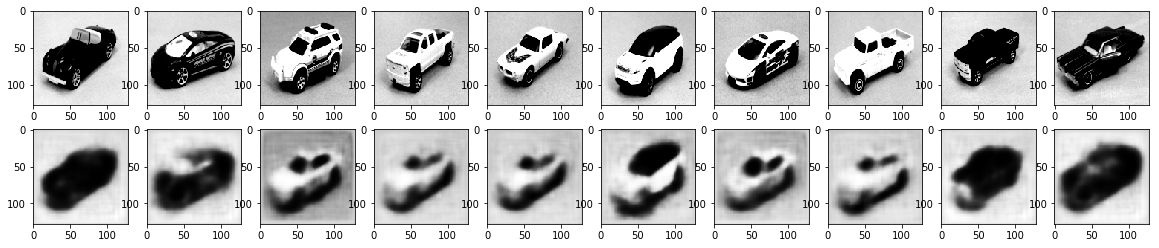

In [12]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [13]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0295 - val_loss: 0.0291
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0292
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0289 - val_loss: 0.0287
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0288 - val_loss: 0.0291
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0287
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0293
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0288 - val_loss: 0.0292
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0297
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0291 - val_loss: 0.0296
Epoch 10/1000
171/171 [==============

Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.0284
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0279 - val_loss: 0.0279
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.0282
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.0278
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.0282
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.0281
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.0286
Epoch 88/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.0288
Epoch 89/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0287 - val_loss: 0.0291
Epoch 90/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.0291
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0279 - val_loss: 0.0280
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0284 - val_loss: 0.0293
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0280 - val_loss: 0.0279
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0284 - val_loss: 0.0286
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0275 - val_loss: 0.0275
Epoch 166/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0279 - val_loss: 0.0280
Epoch 167/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0272 - val_loss: 0.0274
Epoch 168/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0276 - val_loss: 0.0279
Epoch 169/1000
171/171 [==============================] - 0s 1ms

Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0268
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.0269
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0268 - val_loss: 0.0271
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0271 - val_loss: 0.0272
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0272
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0272 - val_loss: 0.0276
Epoch 245/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0274 - val_loss: 0.0272
Epoch 246/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.0275
Epoch 247/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0274 - val_loss: 0.0267
Epoch 248/1000
171/171 [==============================] - 0s 1ms

Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0265 - val_loss: 0.0265
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0272 - val_loss: 0.0277
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 0.0266
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0273 - val_loss: 0.0275
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0265 - val_loss: 0.0258
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.0267
Epoch 324/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.0254
Epoch 325/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0258 - val_loss: 0.0262
Epoch 326/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 327/1000
171/171 [==============================] - 0s 1ms

Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.0253
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0254
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0253 - val_loss: 0.0246
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0249 - val_loss: 0.0247
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0247 - val_loss: 0.0245
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0248 - val_loss: 0.0252
Epoch 403/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0255
Epoch 404/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0258 - val_loss: 0.0266
Epoch 405/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.0262
Epoch 406/1000
171/171 [==============================] - 0s 1ms

Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.0261
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0274 - val_loss: 0.0269
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0259 - val_loss: 0.0248
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.0256
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0247 - val_loss: 0.0239
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0246 - val_loss: 0.0252
Epoch 482/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0244 - val_loss: 0.0241
Epoch 483/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0247 - val_loss: 0.0256
Epoch 484/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0245
Epoch 485/1000
171/171 [==============================] - 0s 1ms

Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0256 - val_loss: 0.0257
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0262 - val_loss: 0.0265
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0264 - val_loss: 0.0252
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0256 - val_loss: 0.0251
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0253 - val_loss: 0.0242
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0243
Epoch 561/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0247 - val_loss: 0.0244
Epoch 562/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0244 - val_loss: 0.0245
Epoch 563/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0250 - val_loss: 0.0251
Epoch 564/1000
171/171 [==============================] - 0s 1ms

Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0245 - val_loss: 0.0239
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0240 - val_loss: 0.0240
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0241 - val_loss: 0.0235
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0238
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0235
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0237
Epoch 640/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0233
Epoch 641/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0235
Epoch 642/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.0230
Epoch 643/1000
171/171 [==============================] - 0s 1ms

Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0224
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0224
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0224
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0224
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0224
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0226
Epoch 719/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0227 - val_loss: 0.0226
Epoch 720/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0227 - val_loss: 0.0228
Epoch 721/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0230 - val_loss: 0.0229
Epoch 722/1000
171/171 [==============================] - 0s 1ms

Epoch 792/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0226
Epoch 793/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0229 - val_loss: 0.0225
Epoch 794/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0224 - val_loss: 0.0227
Epoch 795/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 796/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0226 - val_loss: 0.0230
Epoch 797/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0233 - val_loss: 0.0236
Epoch 798/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0234 - val_loss: 0.0233
Epoch 799/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0238 - val_loss: 0.0240
Epoch 800/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0237 - val_loss: 0.0227
Epoch 801/1000
171/171 [==============================] - 0s 1ms

Epoch 871/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0221 - val_loss: 0.0216
Epoch 872/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0222 - val_loss: 0.0214
Epoch 873/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0218 - val_loss: 0.0212
Epoch 874/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0219 - val_loss: 0.0213
Epoch 875/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0219 - val_loss: 0.0218
Epoch 876/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0222
Epoch 877/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0230 - val_loss: 0.0228
Epoch 878/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0234 - val_loss: 0.0227
Epoch 879/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0235 - val_loss: 0.0226
Epoch 880/1000
171/171 [==============================] - 0s 1ms

Epoch 950/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0207
Epoch 951/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0203
Epoch 952/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0217
Epoch 953/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0215
Epoch 954/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0220 - val_loss: 0.0235
Epoch 955/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0228 - val_loss: 0.0223
Epoch 956/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0229 - val_loss: 0.0231
Epoch 957/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0223 - val_loss: 0.0211
Epoch 958/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0218 - val_loss: 0.0217
Epoch 959/1000
171/171 [==============================] - 0s 1ms

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


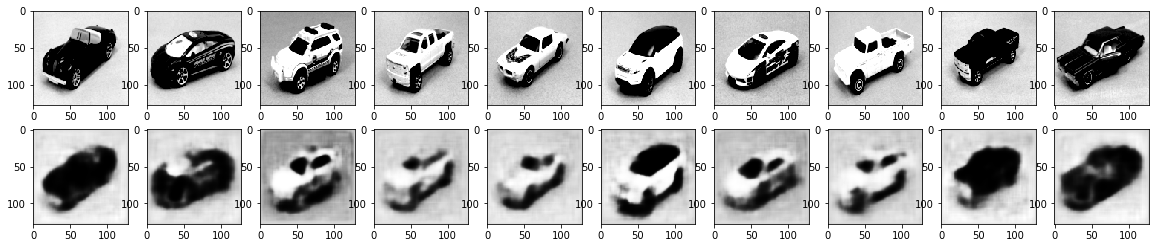

In [14]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [15]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0197
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0195
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0200 - val_loss: 0.0196
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0199
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0203
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0209 - val_loss: 0.0213
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0213 - val_loss: 0.0219
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0228
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.0220
Epoch 10/1000
171/171 [==============

Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0193
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0196
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0197
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0202
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0199
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0200
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0194
Epoch 88/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0194
Epoch 89/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0189
Epoch 90/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0207
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0205
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0201
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0199
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0199
Epoch 166/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0205 - val_loss: 0.0199
Epoch 167/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0209 - val_loss: 0.0203
Epoch 168/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0197
Epoch 169/1000
171/171 [==============================] - 0s 1ms

Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.0204
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0209 - val_loss: 0.0203
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0203
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0194
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0201 - val_loss: 0.0191
Epoch 245/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0196 - val_loss: 0.0185
Epoch 246/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0186
Epoch 247/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0190 - val_loss: 0.0186
Epoch 248/1000
171/171 [==============================] - 0s 1ms

Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0176
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0181
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0175
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0184
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0189 - val_loss: 0.0187
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0197 - val_loss: 0.0198
Epoch 324/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0200
Epoch 325/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0198
Epoch 326/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0204 - val_loss: 0.0192
Epoch 327/1000
171/171 [==============================] - 0s 1ms

Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0181
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0172
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0179
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0172
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0181
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0175
Epoch 403/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0184
Epoch 404/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 405/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0185
Epoch 406/1000
171/171 [==============================] - 0s 1ms

Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0180
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0179
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0183
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0177
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0177
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0174
Epoch 482/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0182 - val_loss: 0.0175
Epoch 483/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0185 - val_loss: 0.0181
Epoch 484/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0188 - val_loss: 0.0183
Epoch 485/1000
171/171 [==============================] - 0s 1ms

Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0162
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0161
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0165
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0166
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.0170
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0178 - val_loss: 0.0173
Epoch 561/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0176
Epoch 562/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0183 - val_loss: 0.0182
Epoch 563/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0178
Epoch 564/1000
171/171 [==============================] - 0s 1ms

Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.0172
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.0167
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0176 - val_loss: 0.0162
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0161
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0160
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0162
Epoch 640/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0162
Epoch 641/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0165
Epoch 642/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.0162
Epoch 643/1000
171/171 [==============================] - 0s 1ms

Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0169 - val_loss: 0.0165
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0152
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.0159
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0150
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0156
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0150
Epoch 719/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0157
Epoch 720/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 721/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0163
Epoch 722/1000
171/171 [==============================] - 0s 1ms

Epoch 792/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0152
Epoch 793/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0146
Epoch 794/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0159 - val_loss: 0.0151
Epoch 795/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0146
Epoch 796/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 797/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0151
Epoch 798/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0165
Epoch 799/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0156
Epoch 800/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0173
Epoch 801/1000
171/171 [==============================] - 0s 1ms

Epoch 871/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0170 - val_loss: 0.0163
Epoch 872/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0163
Epoch 873/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0166
Epoch 874/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0171 - val_loss: 0.0162
Epoch 875/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.0164
Epoch 876/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.0154
Epoch 877/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0157
Epoch 878/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0149
Epoch 879/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 880/1000
171/171 [==============================] - 0s 1ms

Epoch 950/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0151
Epoch 951/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0158 - val_loss: 0.0150
Epoch 952/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0156
Epoch 953/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0153
Epoch 954/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.0158
Epoch 955/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 0.0153
Epoch 956/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0164 - val_loss: 0.0155
Epoch 957/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.0150
Epoch 958/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.0150
Epoch 959/1000
171/171 [==============================] - 0s 1ms

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


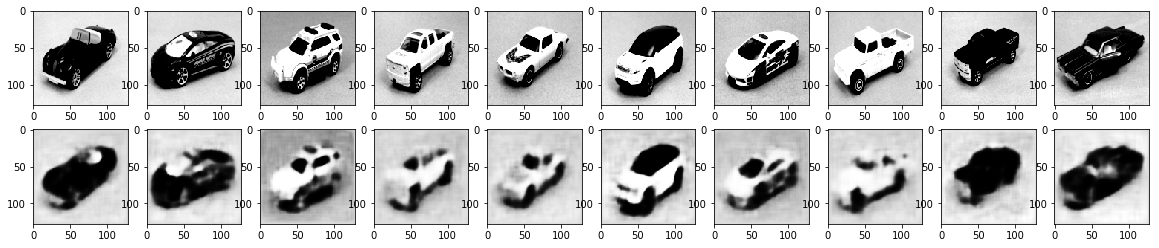

In [16]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [17]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0138
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0138
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0134
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0134
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0136
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0140
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0144
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 0.0148
Epoch 10/1000
171/171 [==============

Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0142
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0141
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0140
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0137
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0138
Epoch 88/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0135
Epoch 89/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0136
Epoch 90/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 0.0135
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0128
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0128
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0125
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0125
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 166/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0123
Epoch 167/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 168/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 169/1000
171/171 [==============================] - 0s 1ms

Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0131
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0137
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0131
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0144 - val_loss: 0.0132
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0143
Epoch 245/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0135
Epoch 246/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0146
Epoch 247/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0134
Epoch 248/1000
171/171 [==============================] - 0s 1ms

Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0135
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0139
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0139
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0145
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0150
Epoch 324/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0154 - val_loss: 0.0142
Epoch 325/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0152 - val_loss: 0.0144
Epoch 326/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0133
Epoch 327/1000
171/171 [==============================] - 0s 1ms

Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0131
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0139
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0148 - val_loss: 0.0141
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0145 - val_loss: 0.0138
Epoch 403/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0147 - val_loss: 0.0135
Epoch 404/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0141 - val_loss: 0.0131
Epoch 405/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0128
Epoch 406/1000
171/171 [==============================] - 0s 1ms

Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0123
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0126
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0126
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 482/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0129
Epoch 483/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0138 - val_loss: 0.0132
Epoch 484/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0140 - val_loss: 0.0132
Epoch 485/1000
171/171 [==============================] - 0s 1ms

Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0118
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0121
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0114
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0116
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0112
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 561/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0114
Epoch 562/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0118
Epoch 563/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 564/1000
171/171 [==============================] - 0s 1ms

Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0118
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0118
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0123
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0122
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0128
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0126
Epoch 640/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0131
Epoch 641/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0126
Epoch 642/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0130
Epoch 643/1000
171/171 [==============================] - 0s 1ms

Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0124
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0125
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 719/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0125
Epoch 720/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0128
Epoch 721/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0127
Epoch 722/1000
171/171 [==============================] - 0s 1ms

Epoch 792/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0118
Epoch 793/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 794/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0122
Epoch 795/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 796/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 797/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0122
Epoch 798/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0132 - val_loss: 0.0124
Epoch 799/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 800/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 801/1000
171/171 [==============================] - 0s 1ms

Epoch 871/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0117
Epoch 872/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0114
Epoch 873/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 874/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0119
Epoch 875/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 0.0130
Epoch 876/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 877/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 878/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0122
Epoch 879/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 880/1000
171/171 [==============================] - 0s 1ms

Epoch 950/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0118
Epoch 951/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0117
Epoch 952/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 953/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0115
Epoch 954/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0112
Epoch 955/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 956/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0112
Epoch 957/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 958/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0113
Epoch 959/1000
171/171 [==============================] - 0s 1ms

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


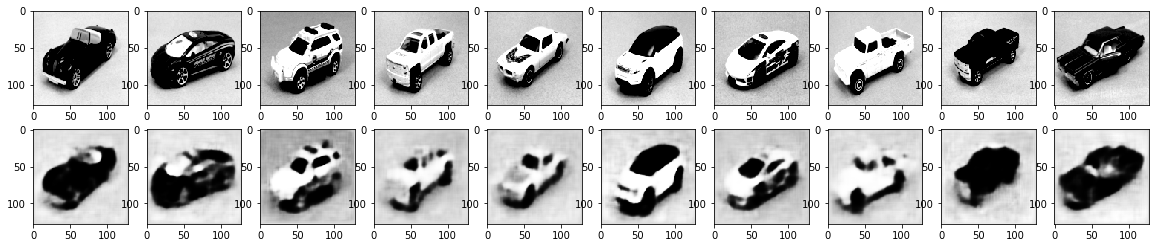

In [18]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [19]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))

Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0113
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0115
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0111
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0114
Epoch 10/1000
171/171 [==============

Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0114
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0114
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0113
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0112
Epoch 88/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 89/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0113
Epoch 90/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0114
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0113
Epoch 166/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0112
Epoch 167/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0111
Epoch 168/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 169/1000
171/171 [==============================] - 0s 1ms

Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0128 - val_loss: 0.0115
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0118
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0124 - val_loss: 0.0110
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0107
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 245/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 246/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0109
Epoch 247/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0110
Epoch 248/1000
171/171 [==============================] - 0s 1ms

Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0101
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 324/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0106
Epoch 325/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 326/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0111
Epoch 327/1000
171/171 [==============================] - 0s 1ms

Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0095
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 403/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 404/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 405/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 406/1000
171/171 [==============================] - 0s 1ms

Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0104
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 482/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 483/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0107
Epoch 484/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 485/1000
171/171 [==============================] - 0s 1ms

Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0108
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 0.0116
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0108
Epoch 561/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 562/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0108
Epoch 563/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 564/1000
171/171 [==============================] - 0s 1ms

Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0097
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0097
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 640/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 641/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 642/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0101
Epoch 643/1000
171/171 [==============================] - 0s 1ms

Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0098
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 719/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0099
Epoch 720/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 721/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 722/1000
171/171 [==============================] - 0s 1ms

Epoch 792/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0114 - val_loss: 0.0102
Epoch 793/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 794/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 795/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0098
Epoch 796/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0096
Epoch 797/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0094
Epoch 798/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0094
Epoch 799/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 800/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 801/1000
171/171 [==============================] - 0s 1ms

Epoch 871/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0102
Epoch 872/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 873/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0099
Epoch 874/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0104
Epoch 875/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 876/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 877/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 878/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 879/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 880/1000
171/171 [==============================] - 0s 1ms

Epoch 950/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0096
Epoch 951/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 952/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0096
Epoch 953/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0097
Epoch 954/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 955/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 956/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 957/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 958/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 959/1000
171/171 [==============================] - 0s 1ms

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


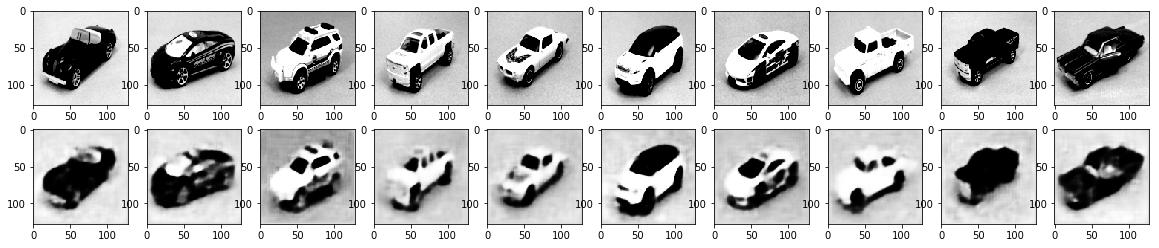

In [20]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [21]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))
vae.save('model_vae_3stage.h5')

Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0097
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0110 - val_loss: 0.0098
Epoch 10/1000
171/171 [==============

Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0090
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0090
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0089
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0090
Epoch 88/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 89/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 90/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 166/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 167/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 168/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 169/1000
171/171 [==============================] - 0s 1ms

Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0095
Epoch 245/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 246/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0095
Epoch 247/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 248/1000
171/171 [==============================] - 0s 1ms

Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0097
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 324/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 325/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 326/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 327/1000
171/171 [==============================] - 0s 1ms

Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0127 - val_loss: 0.0114
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0126 - val_loss: 0.0108
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0110
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0116 - val_loss: 0.0098
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 403/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 404/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 405/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0087
Epoch 406/1000
171/171 [==============================] - 0s 1ms

Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0090
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 482/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0094
Epoch 483/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 484/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 485/1000
171/171 [==============================] - 0s 1ms

Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0088
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0091
Epoch 561/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 562/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 563/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 564/1000
171/171 [==============================] - 0s 1ms

Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 640/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 641/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0090
Epoch 642/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 643/1000
171/171 [==============================] - 0s 1ms

Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0093
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 719/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 720/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 721/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0100
Epoch 722/1000
171/171 [==============================] - 0s 1ms

Epoch 792/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 793/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 794/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 795/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 796/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0089
Epoch 797/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 798/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0088
Epoch 799/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 800/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 801/1000
171/171 [==============================] - 0s 1ms

Epoch 871/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 872/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 873/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 874/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 875/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 876/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 877/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 878/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 879/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.0093
Epoch 880/1000
171/171 [==============================] - 0s 1ms

Epoch 950/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0088
Epoch 951/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 952/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0101 - val_loss: 0.0090
Epoch 953/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 954/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 955/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 956/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 957/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0093
Epoch 958/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 959/1000
171/171 [==============================] - 0s 1ms

(17, 128, 128, 1) -> (17, 8) -> (17, 128, 128, 1)


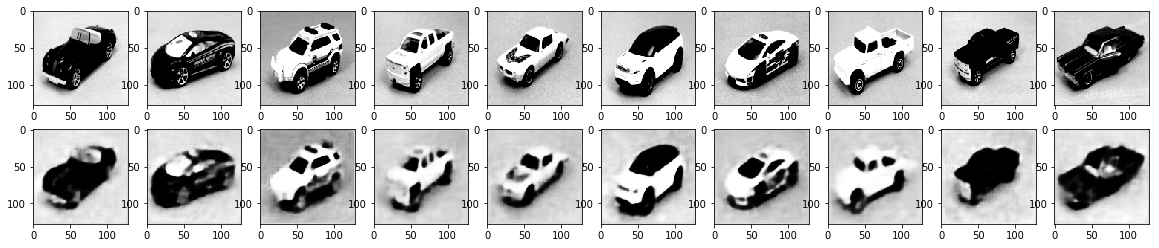

In [22]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [ ]:
vae.fit(x_train, x_train, epochs=1000, batch_size=1024, 
        shuffle=True, validation_data=(x_test,x_test))
vae.save('model_vae_3stage.h5')

Train on 171 samples, validate on 17 samples
Epoch 1/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 2/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 3/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 4/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 5/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 6/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 7/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 8/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 9/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0087
Epoch 10/1000
171/171 [==============

Epoch 81/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0084
Epoch 82/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 83/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 84/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 85/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 86/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 87/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 88/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 89/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0088
Epoch 90/1000
171/171 [==============================] - 0s 1ms/step - lo

Epoch 160/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 161/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0083
Epoch 162/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 163/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 164/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 165/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 166/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 167/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0084
Epoch 168/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 169/1000
171/171 [==============================] - 0s 1ms

Epoch 239/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 240/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0082
Epoch 241/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 242/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0083
Epoch 243/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 244/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0084
Epoch 245/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 246/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0084
Epoch 247/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 248/1000
171/171 [==============================] - 0s 1ms

Epoch 318/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 319/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 320/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0083
Epoch 321/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 0.0083
Epoch 322/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 323/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 324/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 325/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 326/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 327/1000
171/171 [==============================] - 0s 1ms

Epoch 397/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 398/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 399/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 400/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 401/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0081
Epoch 402/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0082
Epoch 403/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0081
Epoch 404/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 405/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 406/1000
171/171 [==============================] - 0s 1ms

Epoch 476/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 477/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 478/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 479/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0079
Epoch 480/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 481/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0079
Epoch 482/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 483/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0079
Epoch 484/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 485/1000
171/171 [==============================] - 0s 1ms

Epoch 555/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 556/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 557/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 558/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 559/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 560/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 561/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0079
Epoch 562/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 563/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 564/1000
171/171 [==============================] - 0s 1ms

Epoch 634/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 0.0084
Epoch 635/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 636/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 637/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 638/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 639/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0084
Epoch 640/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 641/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 642/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 643/1000
171/171 [==============================] - 0s 1ms

Epoch 713/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0071
Epoch 714/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 715/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0074
Epoch 716/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0076
Epoch 717/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0076
Epoch 718/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0078
Epoch 719/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0078
Epoch 720/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0079
Epoch 721/1000
171/171 [==============================] - 0s 1ms/step - loss: 0.0090 - val_loss: 0.0078
Epoch 722/1000
171/171 [==============================] - 0s 1ms

In [ ]:
encoded_latent = enc.predict(x_test)[2]   # z parameter is #2
decoded_imgs = dec.predict(encoded_latent)
print(x_test.shape, '->', encoded_latent.shape, '->', decoded_imgs.shape)
show_original_decoded(x_test, decoded_imgs, 128)

In [28]:
with open("model_vae_3stage.yaml", "w") as yaml_model_file:
    yaml_model_file.write(vae.to_yaml())